# Detecting change points

### Detecting a single change point

In [1]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt

from fastchange.seg.amoc import AmocSeg
from fastchange.costs.normal import NormalMeanVarCost
from fastchange.penalties import mbic_penalty

In [4]:
# Creating synthetic data
data = np.hstack([
    np.random.normal(0, 1, (100,)),
    np.random.normal(5, 2, (100,))
])

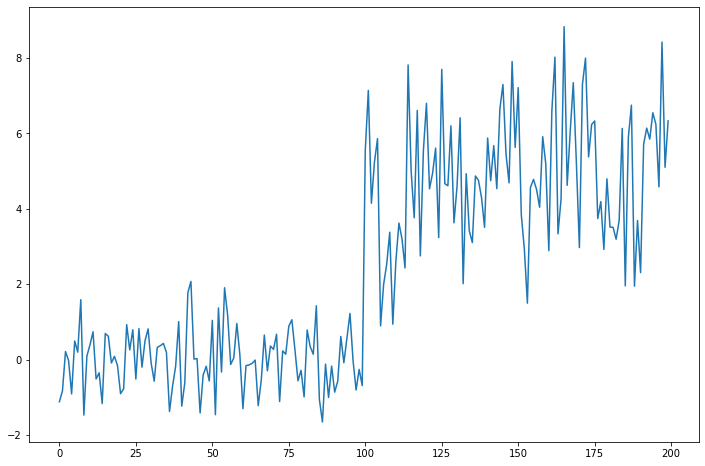

In [7]:
# Plotting our synthetic data
plt.figure(figsize=(12, 8))
plt.plot(data)
plt.show()

In [8]:
# Running AMOC changepoint
model = AmocSeg(NormalMeanVarCost(), mbic_penalty).fit(data)
cpts = model.predict()

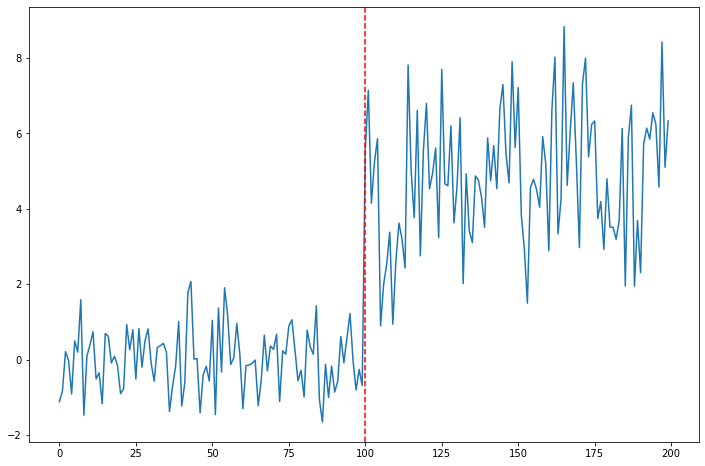

In [9]:
# Plotting our synthetic data with detected change points
plt.figure(figsize=(12, 8))
plt.plot(data)
for i in cpts:
    plt.axvline(i, color='red', linestyle='--')
plt.show()

### Detecting multiple change points

In [32]:
# Creating synthetic data
data = np.hstack([
    np.random.normal(0, 1, (500,)),
    np.random.normal(10, 2, (500,)),
    np.random.normal(8, 1, (500,)),
    np.random.normal(-1, 1, (500,)),
])

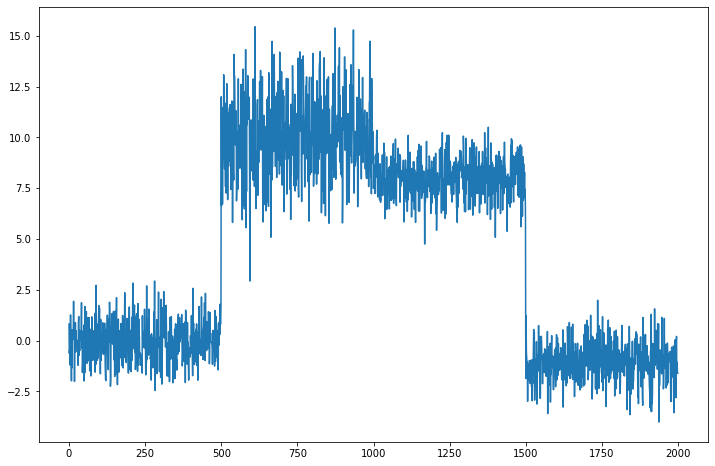

In [33]:
# Plotting our synthetic data
plt.figure(figsize=(12, 8))
plt.plot(data)
plt.show()

#### BinSeg: Fast + Approximate

In [34]:
# Importing binary segmentation
from fastchange.seg.binseg import BinSeg

In [38]:
# Running BinSeg changepoint
model = BinSeg(NormalMeanVarCost(), mbic_penalty, min_len=10, max_cps=5).fit(data)
cpts = model.predict()

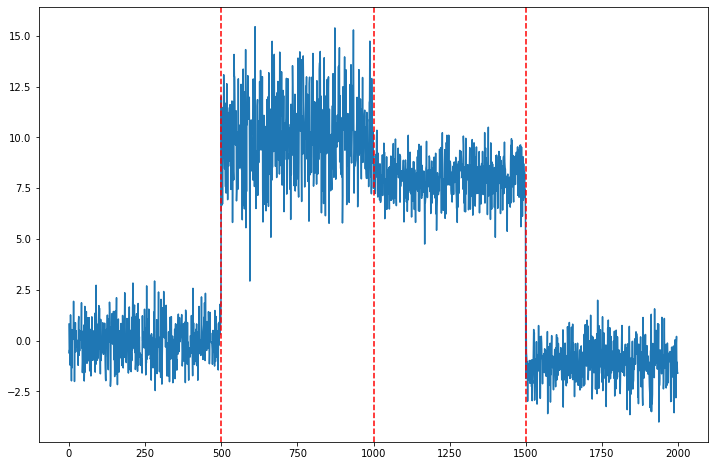

In [39]:
# Plotting our synthetic data with detected change points
plt.figure(figsize=(12, 8))
plt.plot(data)
for i in cpts:
    plt.axvline(i, color='red', linestyle='--')
plt.show()

In [40]:
%timeit BinSeg(NormalMeanVarCost(), mbic_penalty, min_len=10, max_cps=5).fit(data).predict()

864 µs ± 44.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


#### Pelt: Somewhat slower + Exact

In [41]:
# Importing binary segmentation
from fastchange.seg.pelt import PeltSeg

In [42]:
# Running PELT changepoint
model = PeltSeg(NormalMeanVarCost(), mbic_penalty, min_len=10).fit(data)
cpts = model.predict()

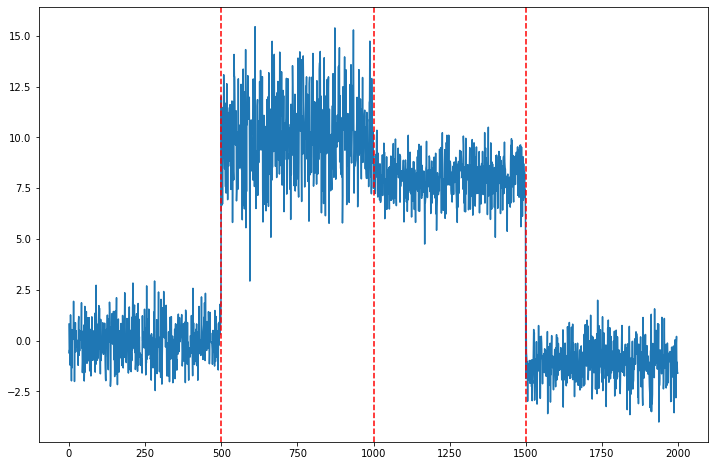

In [43]:
# Plotting our synthetic data with detected change points
plt.figure(figsize=(12, 8))
plt.plot(data)
for i in cpts:
    plt.axvline(i, color='red', linestyle='--')
plt.show()

In [44]:
%timeit PeltSeg(NormalMeanVarCost(), mbic_penalty, min_len=10).fit(data)

1.3 ms ± 72.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
